# MACHINE LEARNING PROJECT - GENDER CLASSIFICATION

## - USING LOGISTIC REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Transformed Data Set - Logistics regression.csv')

In [3]:
data.shape

(66, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [5]:
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [6]:
data.describe(include = 'O').T

,count,unique,top,freq
Favorite Color,66,3,Cool,37
Favorite Music Genre,66,7,Rock,19
Favorite Beverage,66,6,Doesn't drink,14
Favorite Soft Drink,66,4,Coca Cola/Pepsi,32
Gender,66,2,F,33


In [7]:
data['Favorite Color'].value_counts()

Favorite Color
Cool       37
Warm       22
Neutral     7
Name: count, dtype: int64

In [8]:
data['Favorite Music Genre'].value_counts()

Favorite Music Genre
Rock                19
Pop                 17
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: count, dtype: int64

In [9]:
data['Favorite Beverage'].value_counts()

Favorite Beverage
Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: count, dtype: int64

In [10]:
data['Favorite Soft Drink'].value_counts()

Favorite Soft Drink
Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: count, dtype: int64

In [11]:
data['Gender'].value_counts()

Gender
F    33
M    33
Name: count, dtype: int64

In [12]:
data.replace({'Gender':{'F':0,'M':1}},inplace=True)

C:\Users\balaj\AppData\Local\Temp\ipykernel_13592\3460422156.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Gender':{'F':0,'M':1}},inplace=True)


In [13]:
data.head(3)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0
2,Warm,Rock,Wine,Coca Cola/Pepsi,0


In [14]:
data['Favorite Color'].unique()

array(['Cool', 'Neutral', 'Warm'], dtype=object)

In [15]:
data.replace({'Favorite Color':{'Cool':0,'Neutral':1,'Warm':2}},inplace=True)

C:\Users\balaj\AppData\Local\Temp\ipykernel_13592\2525658314.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Favorite Color':{'Cool':0,'Neutral':1,'Warm':2}},inplace=True)


In [16]:
data.head(3)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,Rock,Vodka,7UP/Sprite,0
1,1,Hip hop,Vodka,Coca Cola/Pepsi,0
2,2,Rock,Wine,Coca Cola/Pepsi,0


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
data.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [20]:
for i in ['Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink']:
    data[i] = le.fit_transform(data[i])

In [21]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


In [22]:
data.dtypes

Favorite Color          int64
Favorite Music Genre    int64
Favorite Beverage       int64
Favorite Soft Drink     int64
Gender                  int64
dtype: object

In [23]:
X = data.drop('Gender',axis=1)
y = data['Gender']

In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [25]:
from sklearn.preprocessing import StandardScaler
sdc = StandardScaler()

In [26]:
for i in [X_train , X_test]:
    i = sdc.fit_transform(i)

In [27]:
X_train

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
45,0,2,0,1
1,1,2,3,1
61,0,6,3,1
43,0,6,5,0
9,1,4,5,1
16,0,4,5,0
34,1,2,0,0
4,0,6,3,1
15,2,3,5,1
52,0,2,1,3


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR = LogisticRegression()

In [30]:
LR.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [32]:
y_test

57    1
17    0
20    0
21    0
38    1
58    1
40    1
63    1
6     0
2     0
33    1
39    1
56    1
55    1
Name: Gender, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.35714285714285715

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
CM = confusion_matrix(y_test,y_pred)
CM

array([[3, 2],
       [7, 2]])

In [37]:
len(y_test)

14

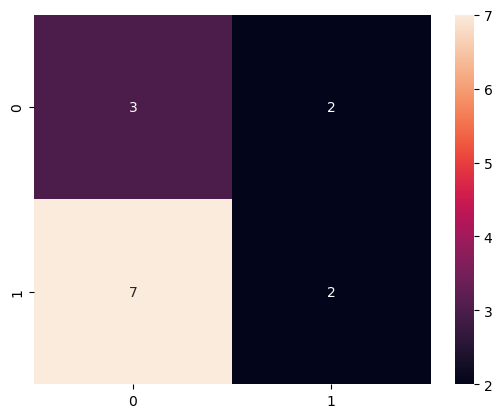

In [38]:
sns.heatmap(CM,annot=True)
plt.show()